# History of F1 at a glance from 1950-2019

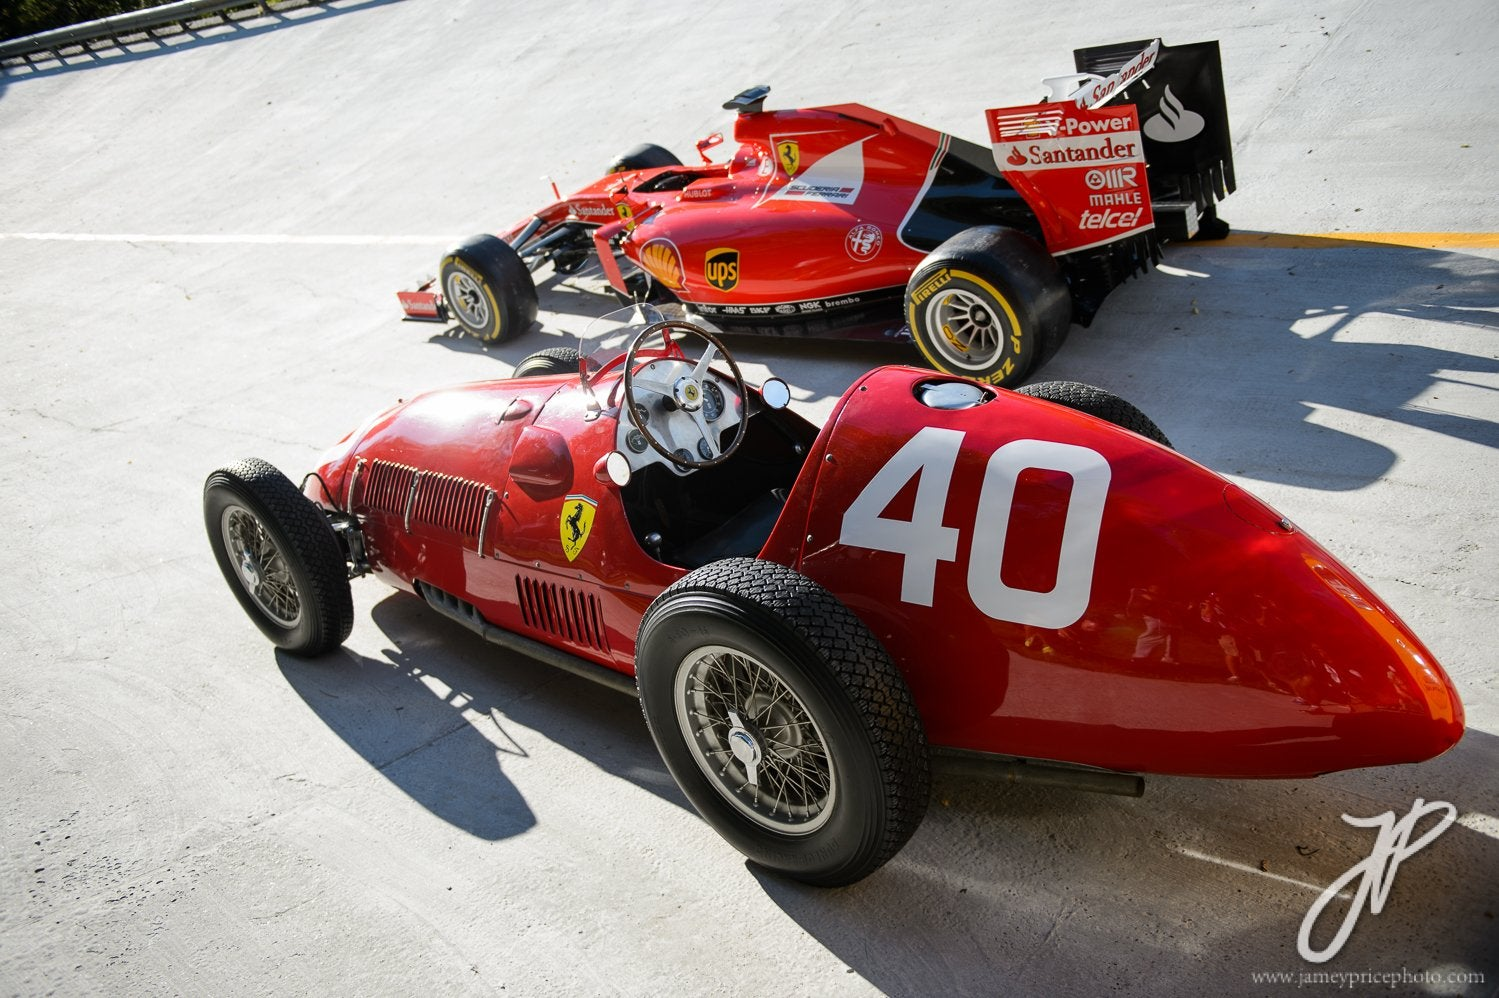

In [1]:
from IPython.display import Image
import os
Image('../input/ferrari/1950to2019.jpg')

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

import sqlite3
from sqlalchemy import create_engine

import matplotlib.pyplot as plt

input_files=os.listdir('/kaggle/input/formula-1-world-championship-1950-2020')

This is F1 fan made notebook trying to look back into the history of it to find answers to some of the many questions. Approach here is to first create SQL data base (sqlite more specifically) using sqlalchemy and then use sql queries to pull required information for the analysis. So without wasting a time let's start creating a data base. <br>
## A) Create Data Base

In [3]:
# Set up a connection with database file to interact with the data base. If this file does not exist then it gets automatically created.
conn=sqlite3.connect("f1_info.db")

In [4]:
engine=create_engine('sqlite:///f1_info.db', echo=False)

Let's define funtions; first to preprocess data and second to remove duplicate entries from the data.

In [5]:
def preprocess_cat_cols(df):
    cat_col=df.select_dtypes(include='object').columns
    for col in cat_col:
        for val in df[col].tolist():
            try:
                if '\\N' in val:
                    df[col].replace({'\\N':'nan'}, inplace=True)
                    break
            except:
                print('Column:',col,'Value:',val)
        df[col].str.strip()
        
        
def duplicate_index(df):
    dup=df.duplicated()
    indices=dup[dup==True].index
    return indices

The data set has follwing tables of information and so we will create separate table for each of table in our sql data base.

In [6]:
input_files

['status.csv',
 'results.csv',
 'qualifying.csv',
 'circuits.csv',
 'driver_standings.csv',
 'constructors.csv',
 'drivers.csv',
 'seasons.csv',
 'constructor_results.csv',
 'pit_stops.csv',
 'constructor_standings.csv',
 'lap_times.csv',
 'races.csv']

### 1. Circuit <br>
This table contains the circuit information wherever F1 race was ever held.

In [7]:
ckt=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/'+input_files[input_files.index('circuits.csv')])
#Column alt has nothing but '\N' so we drop that column
preprocess_cat_cols(ckt)
print(ckt.head())
ckt.to_sql('circuit', con=engine, if_exists='replace')

   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800  nan   
2    Bahrain  26.03250   50.51060  nan   
3      Spain  41.57000    2.26111  nan   
4     Turkey  40.95170   29.40500  nan   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.w


### 2. Constructors <br>
In F1 the teams are called constructors as they are much more than just teams. They build cars of incredible specs from scratch!

In [8]:
input_files.index('constructors.csv')

5

In [9]:
constr=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/'+input_files[input_files.index('constructors.csv')])
preprocess_cat_cols(constr)
print(constr.head())
constr.to_sql('constructors', con=engine, if_exists='replace')

   constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso  


### 3 Constructor Results <br>
Each constructor has two cars and so two drivers. Constructors fights for constructor's championship where two drivers help their constructors to win constructor's championship without compromising their own glories; Driver's championship! Hence, it is important to note constructors' results. Note that in this table constructors are encoded as constructorId.

In [10]:
input_files.index('constructor_results.csv')

8

In [11]:
constr_rsl=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/'+input_files[input_files.index('constructor_results.csv')])
preprocess_cat_cols(constr_rsl)
print(constr_rsl.head())
constr_rsl.to_sql('constructor_results', con=engine, if_exists='replace')

   constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0    nan
1                     2      18              2     8.0    nan
2                     3      18              3     9.0    nan
3                     4      18              4     5.0    nan
4                     5      18              5     2.0    nan


### 4. Constructor Standing <br>
This table shows what is the standing of each costructor after each race.

In [12]:
input_files.index('constructor_standings.csv')

10

In [13]:
constr_std=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/'+input_files[input_files.index('constructor_standings.csv')])
preprocess_cat_cols(constr_std)
print(constr_std)
constr_std.to_sql('constr_std', con=engine, if_exists='replace')

       constructorStandingsId  raceId  constructorId  points  position  \
0                           1      18              1    14.0         1   
1                           2      18              2     8.0         3   
2                           3      18              3     9.0         2   
3                           4      18              4     5.0         4   
4                           5      18              5     2.0         5   
...                       ...     ...            ...     ...       ...   
12341                   27488    1042              4     8.0         6   
12342                   27489    1042             51     2.0         8   
12343                   27490    1042              3     0.0         9   
12344                   27491    1042              9    27.0         3   
12345                   27492    1042            210     0.0        10   

      positionText  wins  
0                1     1  
1                3     0  
2                2     0  
3  

### 5. Drivers <br>
Here, comes the more fun part where our favorite drivers and heros shine. In this table each driver has driverId and little bit bio information.

In [14]:
input_files.index('drivers.csv')

6

In [15]:
drivers=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/'+input_files[input_files.index('drivers.csv')])

drivers['name']=drivers['forename']+' '+drivers['surname']
drivers.drop(['forename','surname'],axis=1,inplace=True)

preprocess_cat_cols(drivers)
print(drivers.head())
drivers.to_sql('drivers', con=engine, if_exists='replace')

Column: url Value: nan
   driverId   driverRef number code         dob nationality  \
0         1    hamilton     44  HAM  1985-01-07     British   
1         2    heidfeld    nan  HEI  1977-05-10      German   
2         3     rosberg      6  ROS  1985-06-27      German   
3         4      alonso     14  ALO  1981-07-29     Spanish   
4         5  kovalainen    nan  KOV  1981-10-19     Finnish   

                                              url               name  
0     http://en.wikipedia.org/wiki/Lewis_Hamilton     Lewis Hamilton  
1      http://en.wikipedia.org/wiki/Nick_Heidfeld      Nick Heidfeld  
2       http://en.wikipedia.org/wiki/Nico_Rosberg       Nico Rosberg  
3    http://en.wikipedia.org/wiki/Fernando_Alonso    Fernando Alonso  
4  http://en.wikipedia.org/wiki/Heikki_Kovalainen  Heikki Kovalainen  


### 6. Drivers Standing <br>
As we saw in the constructor's standing table, this table shows the driver standing of each of the drivers after each of the races he participated in it. I know F1 has very high gender inequality which I hate, but it is what it is and we should work for change! But, unfortunately, all F1 drivers are happened to be males so far.

In [16]:
input_files.index('driver_standings.csv')

4

In [17]:
drivers_std=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/'+input_files[input_files.index('driver_standings.csv')])
preprocess_cat_cols(drivers_std)
print(drivers_std)
drivers_std.to_sql('drivers_std', con=engine, if_exists='replace')

       driverStandingsId  raceId  driverId  points  position positionText  \
0                      1      18         1    10.0         1            1   
1                      2      18         2     8.0         2            2   
2                      3      18         3     6.0         3            3   
3                      4      18         4     5.0         4            4   
4                      5      18         5     4.0         5            5   
...                  ...     ...       ...     ...       ...          ...   
32621              69824    1042       154     0.0        19           19   
32622              69825    1042       825     0.0        18           18   
32623              69826    1042       840     6.0        10           10   
32624              69827    1042       817     4.0        12           12   
32625              69828    1042       830    15.0         6            6   

       wins  
0         1  
1         0  
2         0  
3         0  
4    

### 7. Lap Time <br>
This table provides lap times for all of the laps for all of the drivers for all of the races from 1950 to 2019. This is table is hugee!!!

In [18]:
input_files.index('lap_times.csv')

11

In [19]:
lap_time=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/'+input_files[input_files.index('lap_times.csv')])
preprocess_cat_cols(lap_time)
print(lap_time.head())
lap_time.to_sql('lap_time', con=engine, if_exists='replace')

   raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342


### 8. Pit Stops <br>
This table provides the pit stop information (duration of the stop and lap when pit stop happened) for all the drivers for all of the races.

In [20]:
input_files.index('pit_stops.csv')

9

In [21]:
pit_stops=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/'+input_files[input_files.index('pit_stops.csv')])
preprocess_cat_cols(pit_stops)
print(pit_stops.head())
pit_stops.to_sql('pit_stops', con=engine, if_exists='replace')

   raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842


### 9. Qualifying <br>
Qualifying is a mini-race that happens one day before the actually race event. This is pretty important as it defines from what positions each of the drivers will start the race. This table provides information regarding that.

In [22]:
input_files.index('qualifying.csv')

2

In [23]:
quali=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/'+input_files[input_files.index('qualifying.csv')])
preprocess_cat_cols(quali)
print(quali.head())
quali.to_sql('quali', con=engine, if_exists='replace')

   qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236  


### 10. Races <br>
This table connects many dots for retrieving information. It contains the year in which race was held, what was the sequence of the races in that year and at what circuit race event occured.

In [24]:
input_files.index('races.csv')

12

In [25]:
races=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/'+input_files[input_files.index('races.csv')])
preprocess_cat_cols(races)
print(races)
races.to_sql('races', con=engine, if_exists='replace')

      raceId  year  round  circuitId                         name        date  \
0          1  2009      1          1        Australian Grand Prix  2009-03-29   
1          2  2009      2          2         Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17           Chinese Grand Prix  2009-04-19   
3          4  2009      4          3           Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4           Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                          ...         ...   
1021    1044  2020      4          9           British Grand Prix  2020-08-02   
1022    1045  2020      5          9  70th Anniversary Grand Prix  2020-08-09   
1023    1046  2020      6          4           Spanish Grand Prix  2020-08-16   
1024    1047  2020      7         13           Belgian Grand Prix  2020-08-30   
1025    1048  2020      8         14           Italian Grand Prix  2020-09-06   

          time             

### 11. Results <br>
This table contains all of the information regarding race results.

In [26]:
input_files.index('results.csv')

1

In [27]:
results=pd.read_csv('/kaggle/input/formula-1-world-championship-1950-2020/'+input_files[input_files.index('results.csv')])
results.position.replace({'\\N':1000},inplace=True)
results['position']=results.position.astype('int32').tolist()
grouped=results.groupby(by='raceId')['position']
values=grouped.transform(lambda x: len(x))
indices_to_replace=results[results.position==1000].index.tolist()
values_to_replace=values[indices_to_replace]
results['position'].iloc[indices_to_replace]=values_to_replace

preprocess_cat_cols(results)
print(results.head())
results.to_sql('results', con=engine, if_exists='replace')

   resultId  raceId  driverId  constructorId number  grid  position  \
0         1      18         1              1     22     1         1   
1         2      18         2              2      3     5         2   
2         3      18         3              3      7     7         3   
3         4      18         4              4      5    11         4   
4         5      18         5              1     23     3         5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41

In [28]:
# import necessary libraries
import pandas as pd
import numpy as np
from collections import Counter
import sqlite3
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#plt.style.use('dark_background')
plt.style.use('ggplot')

# B) Analysis of the Constructors <br>
## 1. Constructors by number of race wins

In [29]:
query="""
        select name,r.constructorId,count(raceId) wins from constructors c
        join results r on c.constructorId=r.constructorId
        where r.position=1
        group by r.constructorId
        order by wins desc
"""

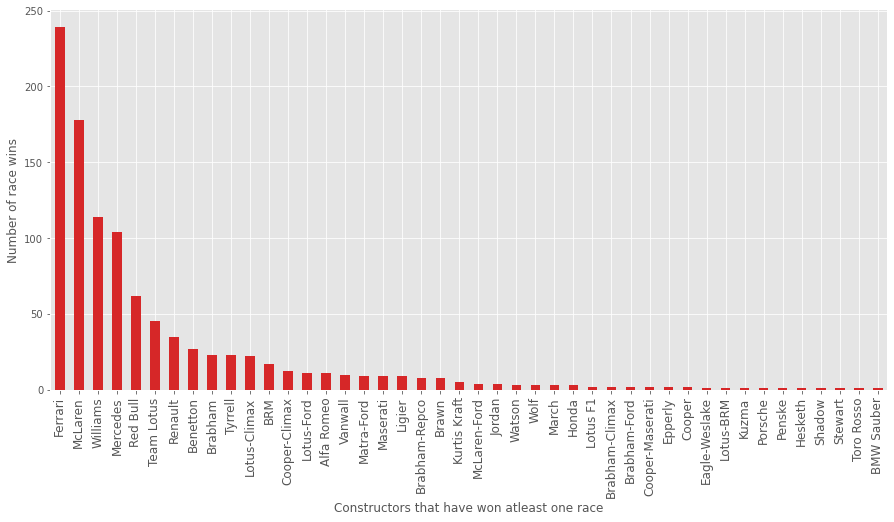

In [30]:
team_race_wins=pd.read_sql_query(query,conn).copy()
fig,ax=plt.subplots(figsize=(15,7))
ax=team_race_wins.wins.plot.bar(x='name',y='wins', color='tab:red')
ax.set_xticks(range(team_race_wins.shape[0]))
ax.set_xticklabels(team_race_wins.name, fontsize=12)
plt.xlabel('Constructors that have won atleast one race', fontsize=12)
plt.ylabel('Number of race wins', fontsize=12);

## 2. Constructors by number of constructors' championship wins <br>

In [31]:
query="""
    select ssq.year, cs.name, max(ssq.total_pts) win_pts from
    (select sq.constructorId, sq.year, sum(sq.pts) total_pts from
    (select rs.constructorId,r.year,sum(rs.points) pts from results rs
    join races r on rs.raceId=r.raceId
    group by rs.raceId, rs.constructorId) sq
    group by sq.constructorId,sq.year) ssq
    join constructors cs
    on ssq.constructorId=cs.constructorId
    group by ssq.year
"""

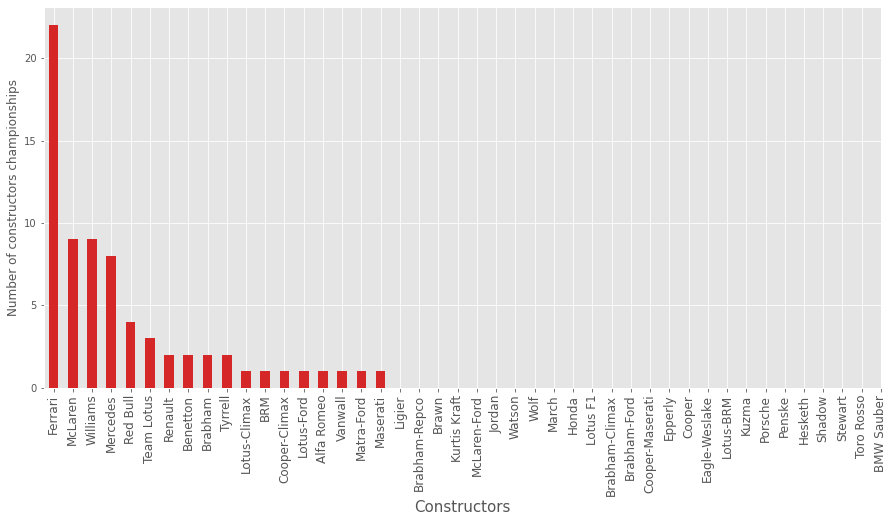

In [32]:
q=pd.read_sql_query(query,conn)
constr_champs_by_year=q.copy()

constr_champs_by_team=constr_champs_by_year.name.value_counts()

fig,ax=plt.subplots(figsize=(15,7))
ax=constr_champs_by_team.plot.bar(color='tab:red')
ax.set_xticks(range(team_race_wins.shape[0]))
ax.set_xticklabels(team_race_wins.name, fontsize=12)
plt.ylabel('Number of constructors championships', fontsize=12)
plt.xlabel('Constructors', fontsize=15);

1. Ferrari has dominated F1 in the race wins and championship wins but their dominance in the championship titles are far more prominant than the race wins. <br>
2. Note, even though McLaren has almost 50 more race wins than Williams, they both have same number of championship titles.

## 3. Constructors by number of driver's championship wins

In [33]:
query="""
    select cs.name, driver_champs from
    (select sqq.constructorId, count(sqq.constructorId) driver_champs from
    (select sq.year, sq.driverId, sq.constructorId, max(pts) season_pts from
    (select rs.driverId, rs.constructorId, r.year, sum(rs.points) pts from results rs
    join races r on rs.raceId=r.raceId
    group by rs.driverId, r.year) sq
    group by sq.year) sqq
    group by sqq.constructorId) sqqq join
    constructors cs on sqqq.constructorId=cs.constructorId
    order by driver_champs desc
"""

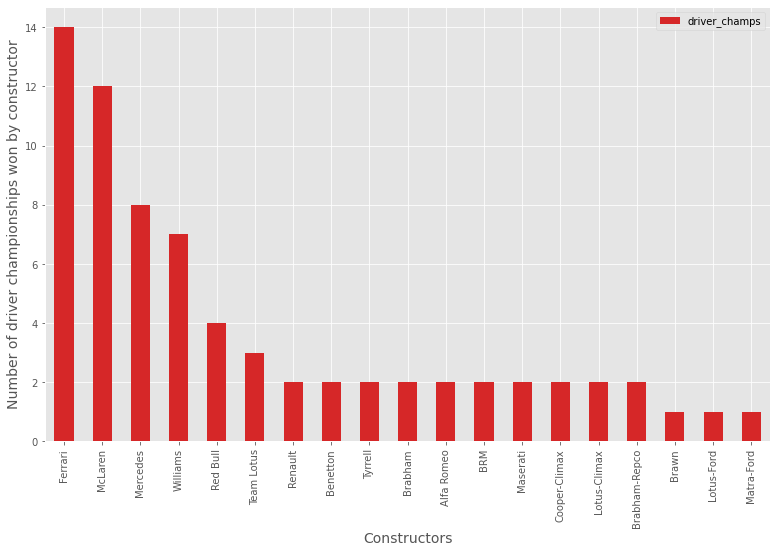

In [34]:
q=pd.read_sql_query(query,conn)
driver_champs_by_team=q.copy()

fig,ax=plt.subplots(figsize=(13,8))
driver_champs_by_team.plot.bar(x='name',y='driver_champs',ax=ax, color='tab:red')
ax.set_xlabel('Constructors',fontsize=14)
ax.set_ylabel('Number of driver championships won by constructor',fontsize=14);

1. Note that McLaren has more driver's chamionships than the constructor's

## 4. Constructors by percentage of constructors' championship wins

In [35]:
query="""
    select sssq.name, sq2.num_seasons ,sssq.num_champ from
    (select ssq.name, count(ssq.name) num_champ from
    (select sq.year, sq.name, max(sq.season_points) win_points from
    (select r.year, cs.name, sum(rs.points) season_points from results rs join
    races r on rs.raceId=r.raceId join
    constructors cs on rs.constructorId=cs.constructorId
    group by cs.name, r.year) sq
    group by sq.year) ssq
    group by ssq.name) sssq join 
    
    (select sq1.name, count(sq1.year) num_seasons from
    (select r.year, cs.name from results rs join
    races r on rs.raceId=r.raceId join
    constructors cs on rs.constructorId=cs.constructorId
    group by cs.name, r.year) sq1
    group by sq1.name) sq2
    
    on
    
    sssq.name=sq2.name
"""


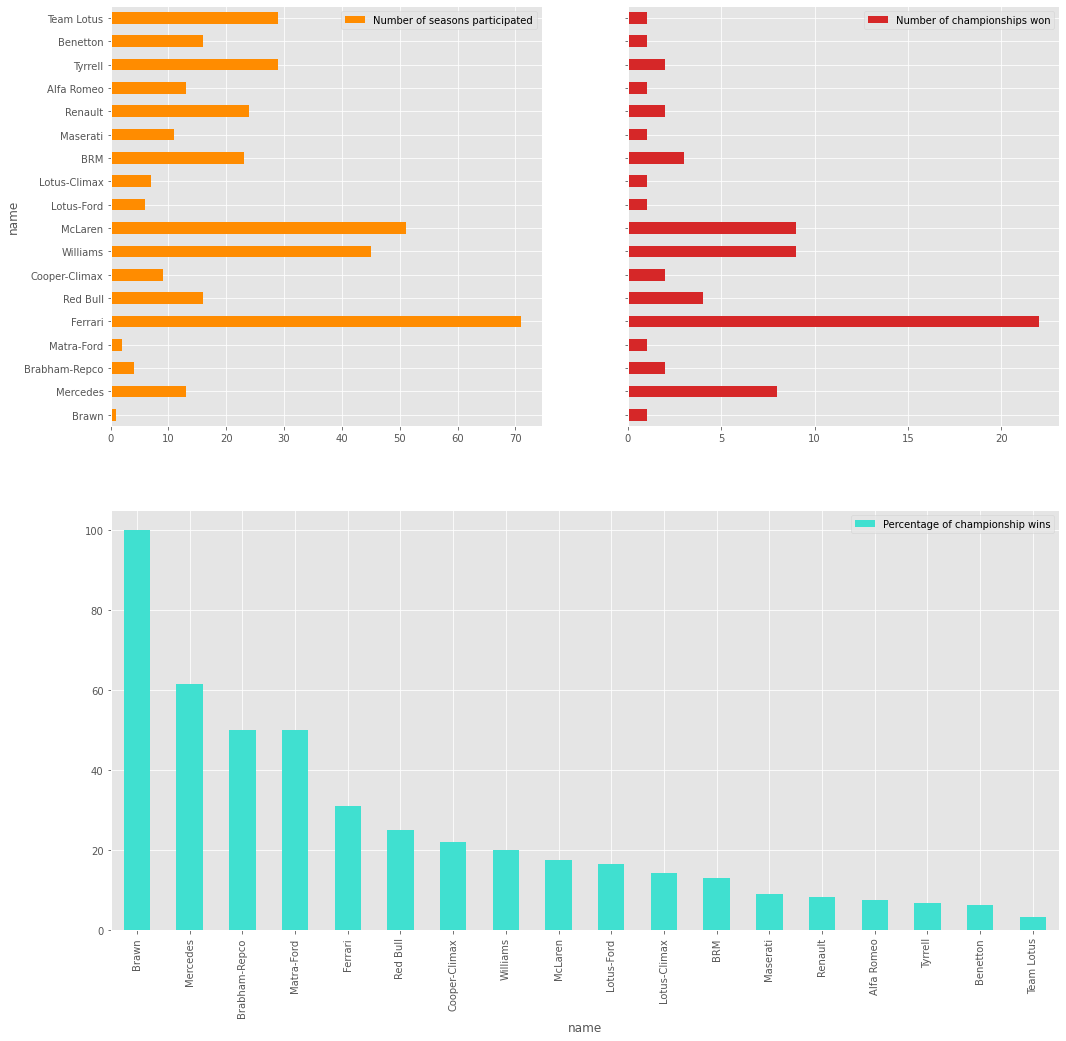

In [36]:
q=pd.read_sql_query(query,conn)
const_champs_seasons=q.copy()
const_champs_seasons['perc_season_champs']=round((const_champs_seasons['num_champ']/const_champs_seasons['num_seasons'])*100,2)
const_champs_seasons.sort_values(by=['perc_season_champs'],ascending=False,inplace=True)

fig=plt.figure(figsize=(17,17))
fig.tight_layout()

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(212)

const_champs_seasons.plot.barh(x='name',y='num_seasons',ax=ax1, color='darkorange' ,label='Number of seasons participated')
const_champs_seasons.plot.barh(x='name',y='num_champ',ax=ax2, sharey=ax1, color='tab:red' ,label='Number of championships won')
const_champs_seasons.plot.bar(x='name',y='perc_season_champs',ax=ax3, color='turquoise' ,label='Percentage of championship wins');

1. Ferrari has participated many more times than any other team. In fact, it is the only team to participate in every 70 F1 seasons from 1950.
2. Mercedes is the current team to beat as it has more than 50% chance of winning a season title.

## 5. Constructors by constructors' championship wins over the period of years

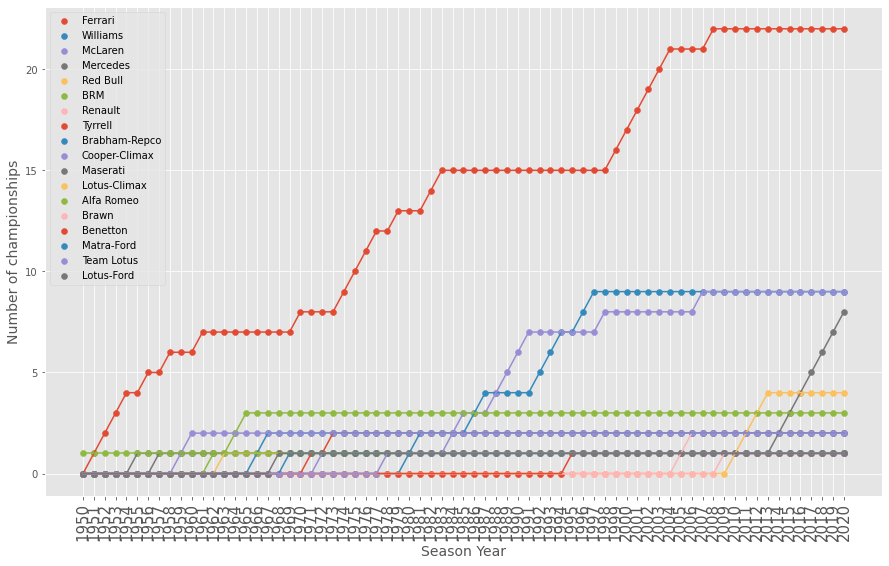

In [37]:
champ_teams=constr_champs_by_team.index
ohe_teams=pd.get_dummies(constr_champs_by_year.name)
champ_teams_by_year=dict()
for team in champ_teams:    
    champ_teams_by_year[team]=np.cumsum(ohe_teams[team])

# plot the chart
fig,ax=plt.subplots(figsize=(15,9))
for team,performance in champ_teams_by_year.items():
    ax.plot(performance)
    ax.scatter(range(len(performance)),performance,label=team)
ax.set_ylabel('Number of championships', fontsize=14)
ax.set_xlabel('Season Year', fontsize=14)
ax.set_xticks(range(constr_champs_by_year.shape[0]))
ax.set_xticklabels(constr_champs_by_year.year.tolist(), rotation='vertical', fontsize=15)
plt.legend();

1. In the history of Ferrari there were momemnts when they had not been winning the constructor's title for a long time. Those periods are 1961-1969, 1982-1998, 2008-2019(present).
2. During these periods other teams had find their glories. From 1982-1998 it was McLaren and Williams and 2008-2019 it was Red Bull and Mercedes.

## 6. Constructors by number of driver championship wins over the period of years

In [38]:
query="""
    select sqq.year, cs.name from
    (select sq.year, sq.driverId, sq.constructorId, max(pts) season_pts from
    (select rs.driverId, rs.constructorId, r.year, sum(rs.points) pts from results rs
    join races r on rs.raceId=r.raceId
    group by rs.driverId, r.year) sq
    group by sq.year) sqq join
    constructors cs on
    cs.constructorId=sqq.constructorId
    order by sqq.year
"""

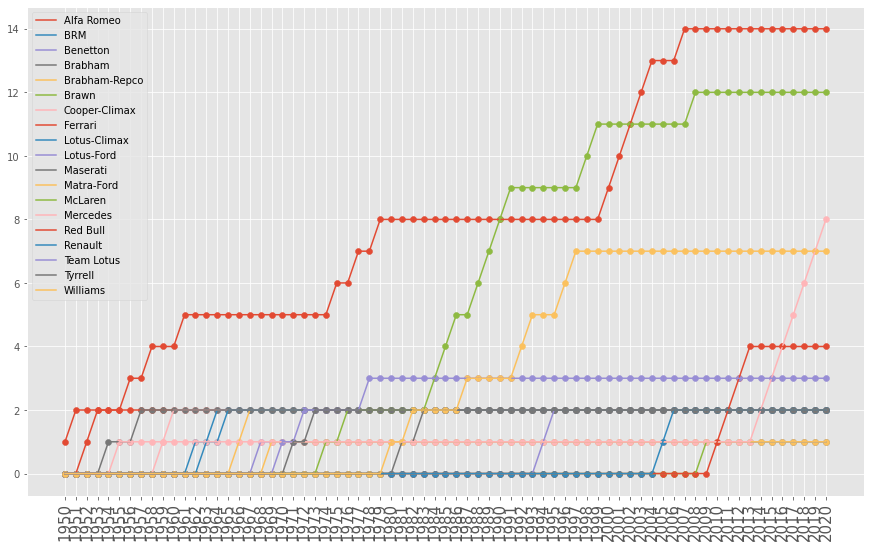

In [39]:
q=pd.read_sql_query(query,conn)
drivers_champs_by_team_yearly=q.copy()

champ_teams_for_drivers=drivers_champs_by_team_yearly.name.tolist()
ohe_champ_teams_for_drivers=pd.get_dummies(drivers_champs_by_team_yearly)
champ_teams_for_drivers=dict()
for team in ohe_champ_teams_for_drivers.columns[1:]:
    champ_teams_for_drivers[team.split('_')[1]]=np.cumsum(ohe_champ_teams_for_drivers[team])

# plot the graph
fig,ax=plt.subplots(figsize=(15,9))
for team,driver_champs in champ_teams_for_drivers.items():
    ax.plot(driver_champs, label=team)
    ax.scatter(range(drivers_champs_by_team_yearly.shape[0]),driver_champs)
ax.set_xticks(range(drivers_champs_by_team_yearly.shape[0]))
ax.set_xticklabels(drivers_champs_by_team_yearly.year.tolist(), rotation='vertical', fontsize=15)
plt.legend();

1. Similar to the chart above, in the driver's championship too, Ferrari had major sequence of seasons when its drivers weren't winning the driver's title as well. These seasons are from 1961-1974, 1979-2000, 2007-2019 <br>
2. During these periods drivers from other teams won the titles mainly McLaren and Williams in 1979-2000 and Red Bull and Mercedes in 2007-2019.

# C) Analysis of Drivers
## 1. Drivers by percentage championship won

In [40]:
query="""
    select sssq.name, sq2.num_seasons ,sssq.num_champ from
    (select ssq.name, count(ssq.name) num_champ from
    (select sq.year, sq.name, max(sq.season_points) win_points from
    (select r.year, dr.name, sum(rs.points) season_points from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId
    group by dr.name, r.year) sq
    group by sq.year) ssq
    group by ssq.name) sssq join 
    
    (select sq1.name, count(sq1.year) num_seasons from
    (select r.year, dr.name from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId
    group by dr.name, r.year) sq1
    group by sq1.name) sq2
    
    on
    
    sssq.name=sq2.name
"""

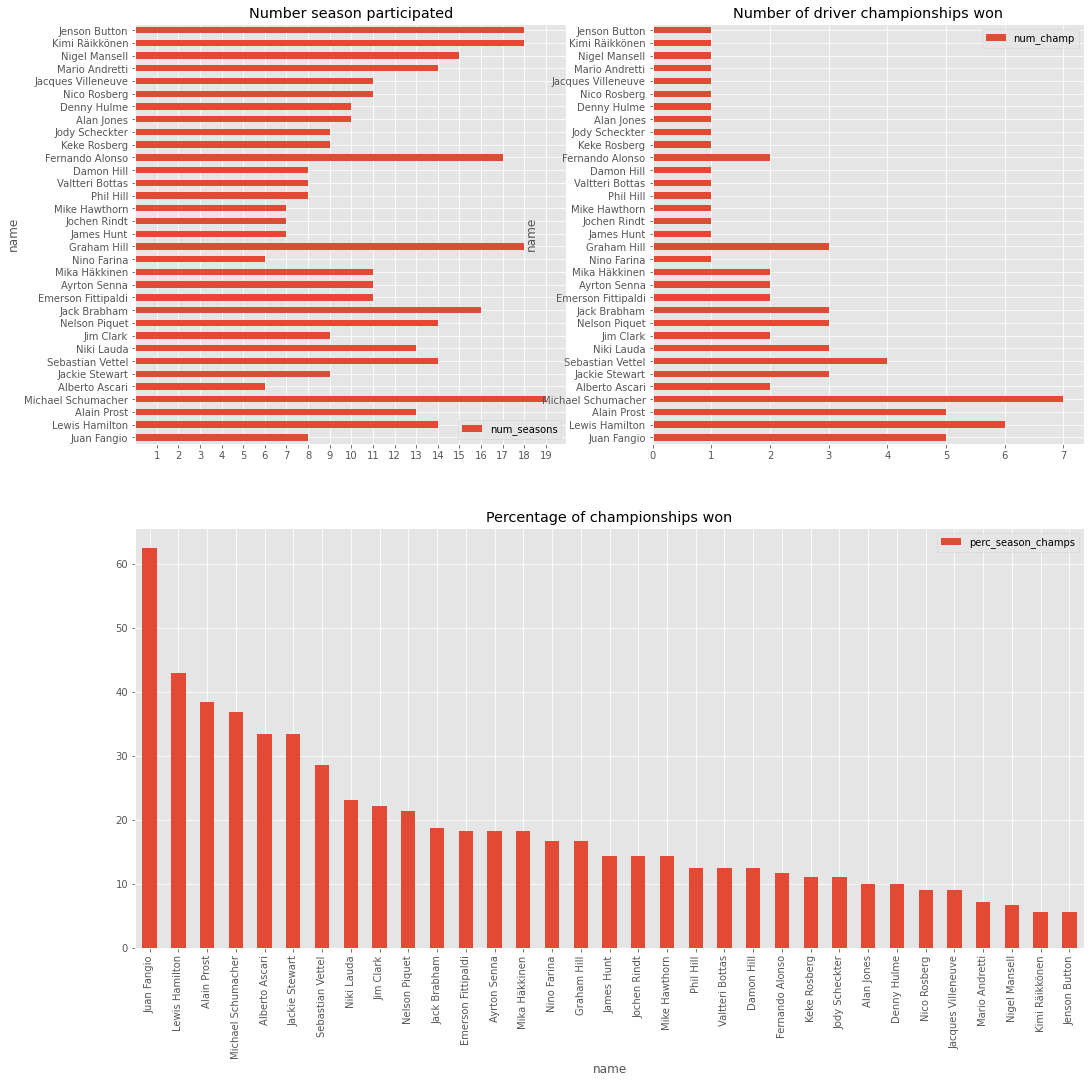

In [41]:
q=pd.read_sql_query(query,conn)
dr_champs_seasons=q.copy()
dr_champs_seasons['perc_season_champs']=round((dr_champs_seasons['num_champ']/dr_champs_seasons['num_seasons'])*100,2)
dr_champs_seasons.sort_values(by=['perc_season_champs'],ascending=False,inplace=True)

fig=plt.figure(figsize=(17,17))
fig.tight_layout()

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(212)

dr_champs_seasons.plot.barh(x='name',y='num_seasons',ax=ax1)
ax1.set_xticks(range(1,max(dr_champs_seasons['num_seasons'])+1))
ax1.set_title('Number season participated')

dr_champs_seasons.plot.barh(x='name',y='num_champ',ax=ax2)
ax2.set_title('Number of driver championships won')

dr_champs_seasons.plot.bar(x='name',y='perc_season_champs',ax=ax3)
ax3.set_title('Percentage of championships won');

This plot shows how difficult it is for a driver to win driver's championship. There are many great names in the plot and some of the ones are just little over 5% of winning a title in their entire F1 career.

## 2. Drivers by number of race wins

In [42]:
query="""
    select sq.name, count(*) num_wins from
    (select dr.name from results rs join
    drivers dr on rs.driverId=dr.driverId
    where rs.position==1) sq
    group by sq.name
    order by num_wins desc limit(25)
"""

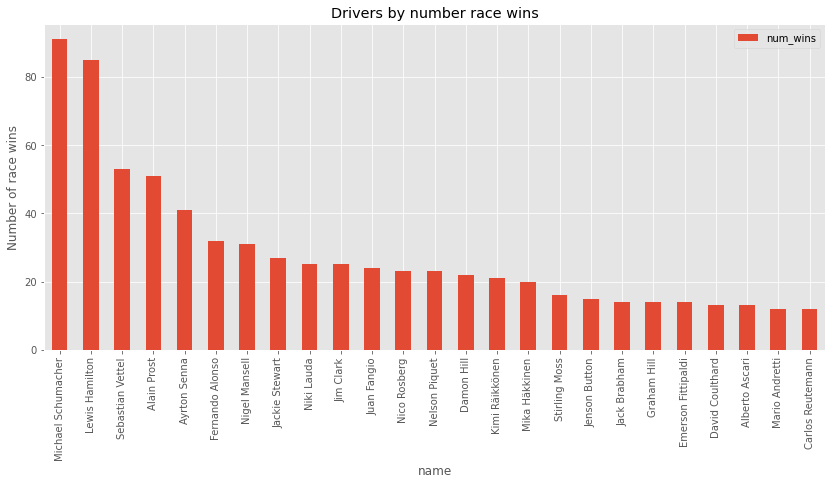

In [43]:
dr_race_wins=pd.read_sql_query(query,conn)
fig,ax=plt.subplots(figsize=(14,6))
dr_race_wins.plot.bar(x='name',y='num_wins',ax=ax)
ax.set_title('Drivers by number race wins')
ax.set_ylabel('Number of race wins');

## 3. Drivers by number of race wins in debut season

In [44]:
query="""
    select dr.name, count(*) num_race_wins, sq.debut_season from results rs
    
    join
    
    races r on rs.raceId=r.raceId
    
    join
    
    drivers dr on rs.driverId=dr.driverId
    
    join
    
    (select rs.driverId, min(r.year) debut_season from results rs join
    races r on rs.raceId=r.raceId
    group by rs.driverId) sq
    
    on
    
    rs.driverId=sq.driverId and r.year=sq.debut_season
    
    where rs.position=1
    
    group by dr.name
    
    order by num_race_wins desc
"""

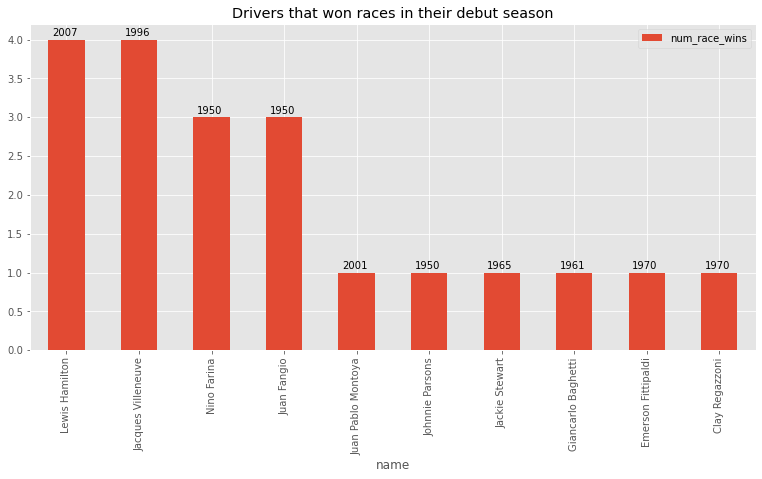

In [45]:
dr_debut_wins=pd.read_sql_query(query,conn)
fig,ax=plt.subplots(figsize=(13,6))
dr_debut_wins.plot.bar(x='name',y='num_race_wins',ax=ax)
ax.set_title('Drivers that won races in their debut season')

xlocs, xlabs = plt.xticks()
for i,v in enumerate(dr_debut_wins.debut_season):
    plt.text(xlocs[i]-0.2,dr_debut_wins.num_race_wins[i]+0.05, str(v))

## 4. Drivers by number of podium finishes in a debut season

In [46]:
query="""
    select dr.name, count(*) num_podiums, sq.debut_season from results rs
    
    join
    
    races r on rs.raceId=r.raceId
    
    join
    
    drivers dr on rs.driverId=dr.driverId
    
    join
    
    (select rs.driverId, min(r.year) debut_season from results rs join
    races r on rs.raceId=r.raceId
    group by rs.driverId) sq
    
    on
    
    rs.driverId=sq.driverId and r.year=sq.debut_season
    
    where rs.position<4
    
    group by dr.name
    
    order by num_podiums desc
"""

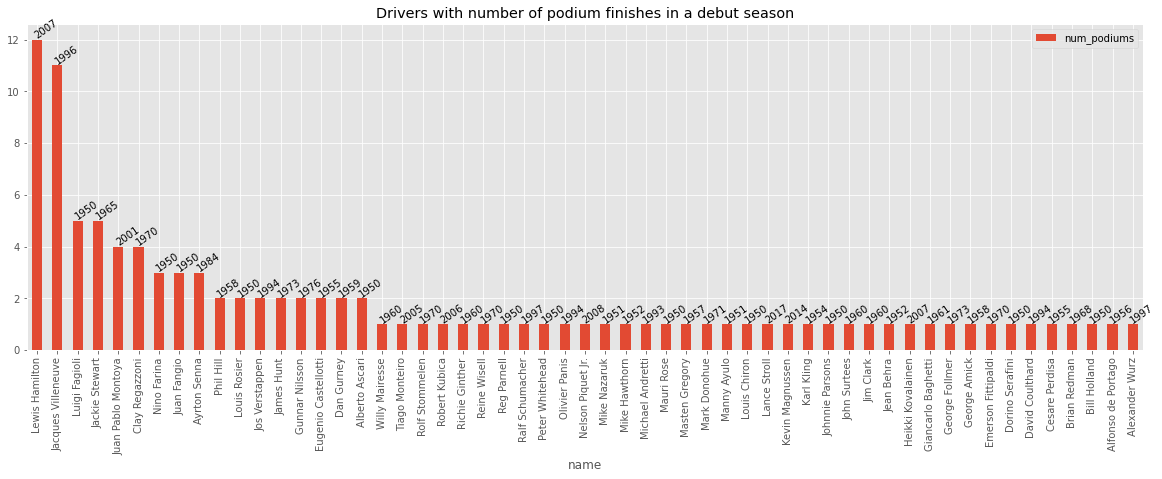

In [47]:
dr_debut_podiums=pd.read_sql_query(query,conn)
fig,ax=plt.subplots(figsize=(20,6))
dr_debut_podiums.plot.bar(x='name',y='num_podiums',ax=ax)
ax.set_title('Drivers with number of podium finishes in a debut season');

xlocs, xlabs = plt.xticks()
for i,v in enumerate(dr_debut_podiums.debut_season):
    plt.text(xlocs[i]-0.2,dr_debut_podiums.num_podiums[i]+0.05, str(v), rotation=35)

## 5. Drivers by number of pole positions

In [48]:
query="""
    select sq.name, count(*) num_pole_positions from
    (select dr.name from results rs join
    drivers dr on rs.driverId=dr.driverId
    where rs.grid==1) sq
    group by sq.name
    order by num_pole_positions desc limit(25)
"""

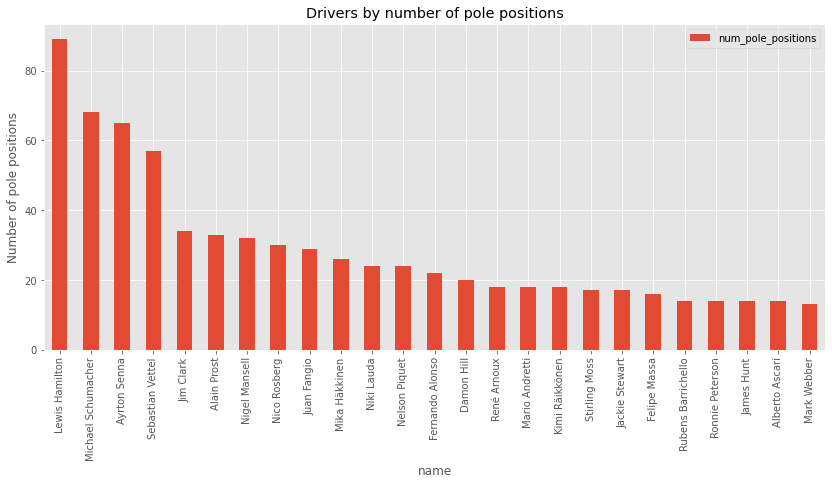

In [49]:
q=pd.read_sql_query(query,conn)
fig,ax=plt.subplots(figsize=(14,6))
q.plot.bar(x='name',y='num_pole_positions',ax=ax)
ax.set_title('Drivers by number of pole positions')
ax.set_ylabel('Number of pole positions');

## 6. Drivers by a number of pole positions in a debut season

In [50]:
query="""
    select dr.name, count(*) num_poles, sq.debut_season from results rs
    
    join
    
    races r on rs.raceId=r.raceId
    
    join
    
    drivers dr on rs.driverId=dr.driverId
    
    join
    
    (select rs.driverId, min(r.year) debut_season from results rs join
    races r on rs.raceId=r.raceId
    group by rs.driverId) sq
    
    on
    
    rs.driverId=sq.driverId and r.year=sq.debut_season
    
    where rs.grid=1
    
    group by dr.name
    
    order by num_poles desc
"""

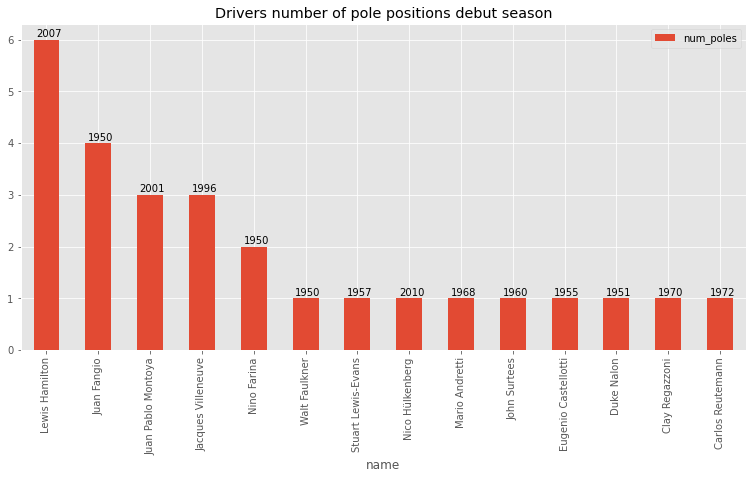

In [51]:
dr_debut_poles=pd.read_sql_query(query,conn)

fig,ax=plt.subplots(figsize=(13,6))
dr_debut_poles.plot.bar(x='name',y='num_poles',ax=ax)
ax.set_title('Drivers number of pole positions debut season')

xlocs, xlabs = plt.xticks()
for i,v in enumerate(dr_debut_poles.debut_season):
    plt.text(xlocs[i]-0.2,dr_debut_poles.num_poles[i]+0.05, str(v))

## 7. Drivers by number of wins at a same circuit

In [52]:
query="""
    select dr.name driver_name, ckt.location circuit_name, max(sq.ckt_wins) most_ckt_wins from
    
    (select rs.driverId, r.circuitId, count(*) ckt_wins from results rs join
    races r on rs.raceId=r.raceId join
    circuit ckt on r.circuitId=ckt.circuitId
    where rs.position=1
    group by rs.driverId, r.circuitId) sq
    
    join
    
    drivers dr on sq.driverId=dr.driverId
    
    join
    
    circuit ckt on sq.circuitId=ckt.circuitId
    
    group by sq.driverId
    having most_ckt_wins>1
    order by most_ckt_wins desc
"""

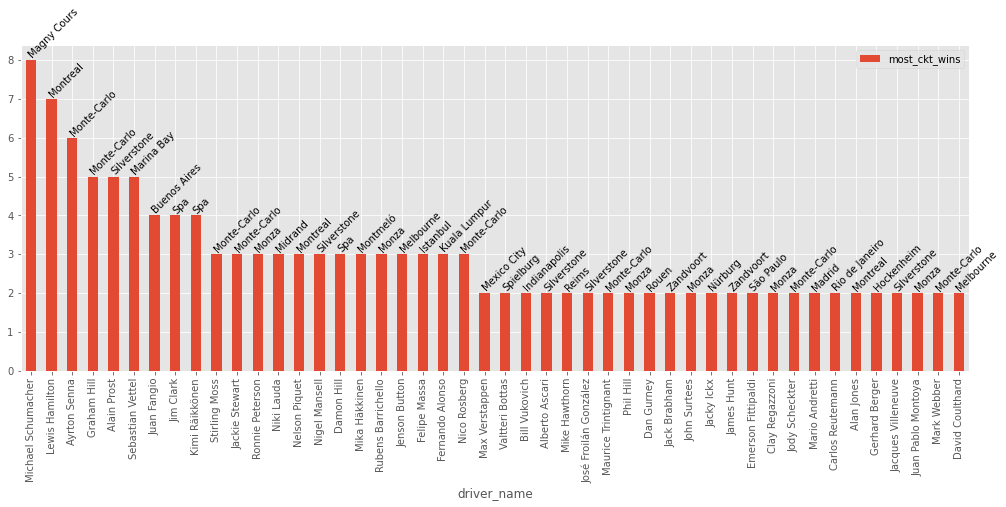

In [53]:
dr_most_ckt_wins=pd.read_sql_query(query,conn)

fig,ax=plt.subplots(figsize=(17,6))

dr_most_ckt_wins.plot.bar(x='driver_name',y='most_ckt_wins',ax=ax)

xlocs, xlabs = plt.xticks()
for i,v in enumerate(dr_most_ckt_wins.circuit_name):
    plt.text(xlocs[i]-0.2,dr_most_ckt_wins.most_ckt_wins[i]+0.05, str(v), rotation=45);

## 8. Drivers by number of poles on same circuit

In [54]:
query="""
    select dr.name driver_name, ckt.location circuit_name, max(sq.ckt_poles) most_ckt_poles from
    
    (select rs.driverId, r.circuitId, count(*) ckt_poles from results rs join
    races r on rs.raceId=r.raceId join
    circuit ckt on r.circuitId=ckt.circuitId
    where rs.grid=1
    group by rs.driverId, r.circuitId) sq
    
    join
    
    drivers dr on sq.driverId=dr.driverId
    
    join
    
    circuit ckt on sq.circuitId=ckt.circuitId
    
    group by sq.driverId
    having most_ckt_poles>1
    
    order by most_ckt_poles desc
"""

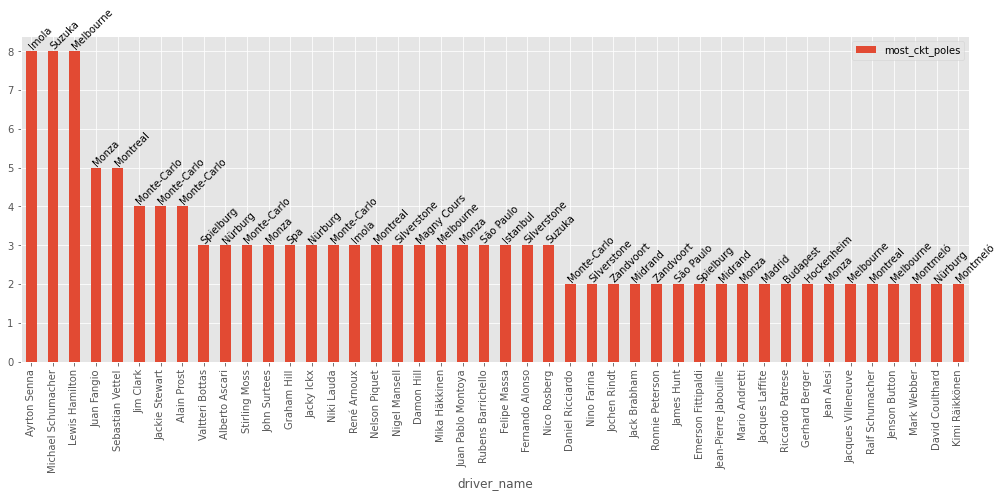

In [55]:
dr_most_ckt_poles=pd.read_sql_query(query,conn)

fig,ax=plt.subplots(figsize=(17,6))

dr_most_ckt_poles.plot.bar(x='driver_name',y='most_ckt_poles',ax=ax)

xlocs, xlabs = plt.xticks()
for i,v in enumerate(dr_most_ckt_poles.circuit_name):
    plt.text(xlocs[i]-0.2,dr_most_ckt_poles.most_ckt_poles[i]+0.05, str(v), rotation=45);

## 9. Drivers by number of race wins on the different circuits

In [56]:
query="""
    select count(distinct(r.circuitId)) distinct_ckt_wins, dr.name from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId
    where rs.position=1
    group by rs.driverId
    order by distinct_ckt_wins desc
"""

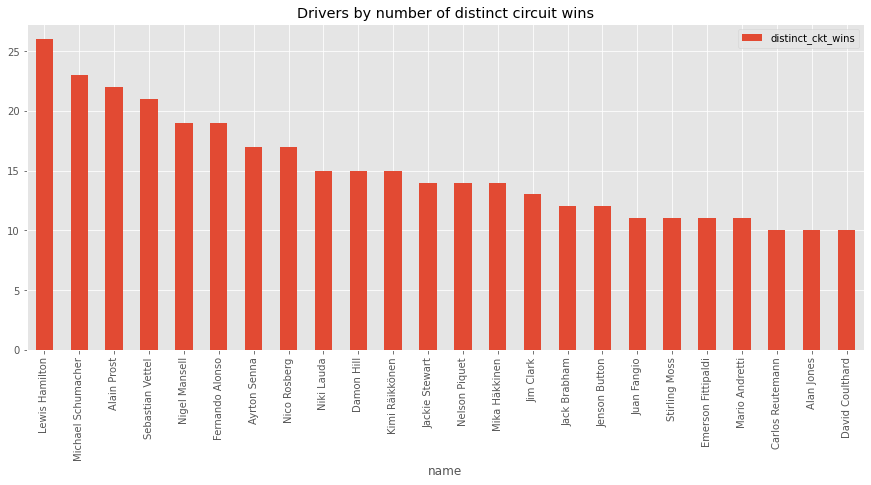

In [57]:
dr_ckt_wins=pd.read_sql_query(query,conn)
dr_ckt_wins=dr_ckt_wins[dr_ckt_wins.distinct_ckt_wins>=10]
fig,ax=plt.subplots(figsize=(15,6))
dr_ckt_wins.plot.bar(x='name',y='distinct_ckt_wins',ax=ax)
ax.set_title('Drivers by number of distinct circuit wins');

## 10. Drivers by pole positions at different grand prix

In [58]:
query="""
    select count(distinct(r.circuitId)) distinct_ckt_poles, dr.name from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId
    where rs.grid=1
    group by rs.driverId
    order by distinct_ckt_poles desc
"""

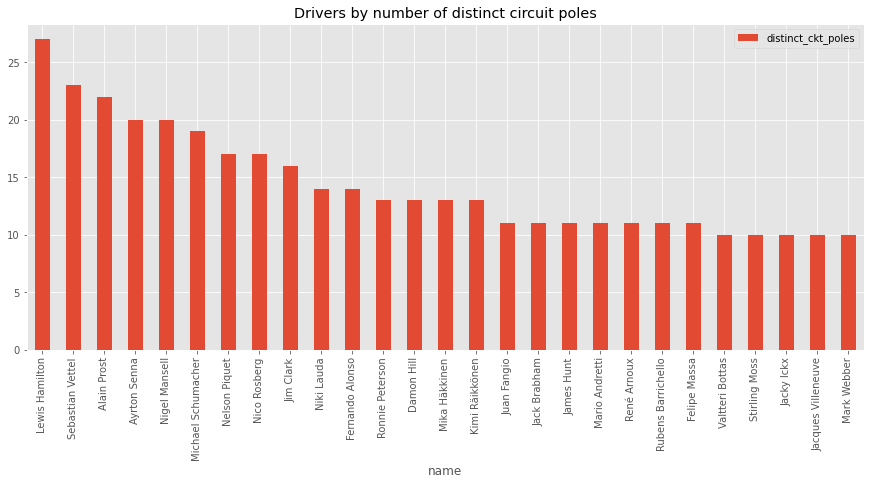

In [59]:
dr_ckt_poles=pd.read_sql_query(query,conn)
dr_ckt_poles=dr_ckt_poles[dr_ckt_poles.distinct_ckt_poles>=10]
fig,ax=plt.subplots(figsize=(15,6))
dr_ckt_poles.plot.bar(x='name',y='distinct_ckt_poles',ax=ax)
ax.set_title('Drivers by number of distinct circuit poles');

## 11. Drivers by number of seasons with atleast one race win

In [60]:
query="""
    select count(distinct(r.year)) seasons_with_win, dr.name from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId
    where rs.position=1
    group by dr.name
    having seasons_with_win>1
    order by seasons_with_win desc
"""

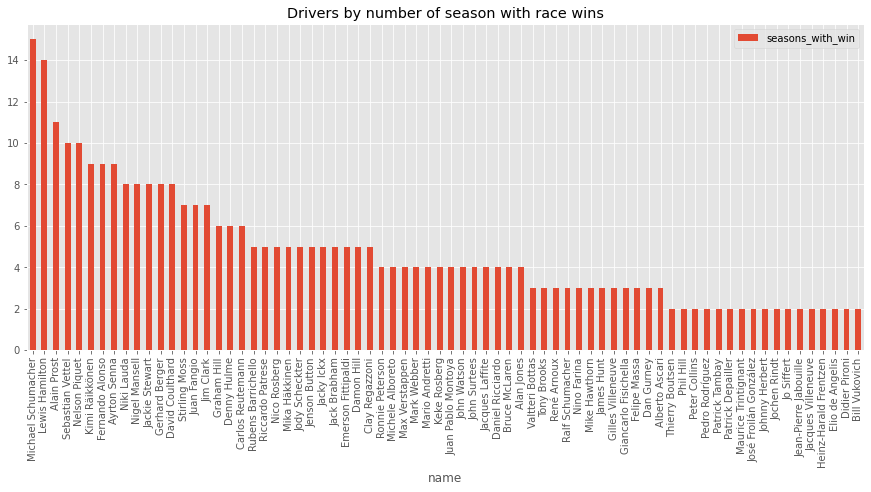

In [61]:
dr_season_with_wins=pd.read_sql_query(query,conn)
fig,ax=plt.subplots(figsize=(15,6))
dr_season_with_wins.plot.bar(x='name',y='seasons_with_win',ax=ax)
ax.set_title('Drivers by number of season with race wins');

## 12. Drivers by average points scored in a career (using 2019 pointing system)

In [62]:
query="""
    select dr.name, rs.position from drivers dr join
    results rs on dr.driverId=rs.driverId
    where dr.name in
    (select distinct(dr.name) from drivers dr join
    results rs on dr.driverId=rs.driverId
    where rs.position<4)
"""

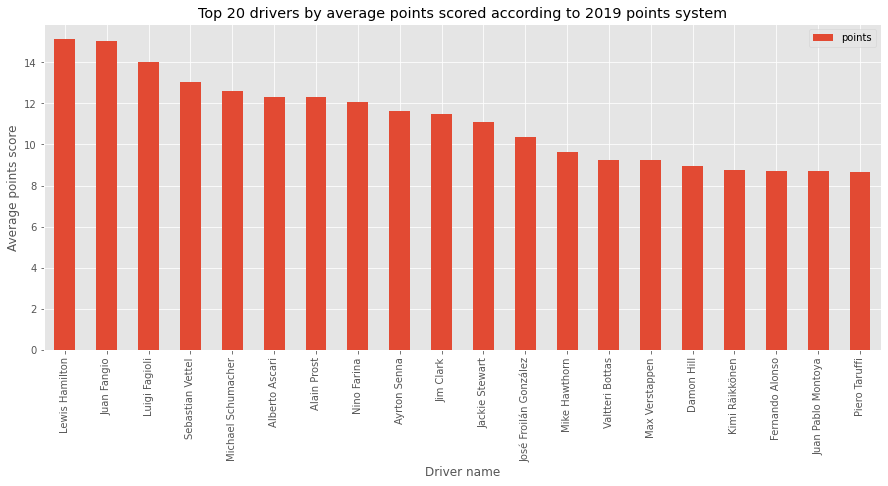

In [63]:
q=pd.read_sql_query(query,conn)
q.rename(columns={'position':'points'}, inplace=True)
avg_pts_df=q.groupby('name').filter(lambda x: len(x)>6)

oop=avg_pts_df[avg_pts_df.points>10].index
avg_pts_df.points[oop]=0
avg_pts_df['points'].replace({1:25,2:18,3:15,4:12,5:10,6:8,7:6,8:4,9:2,10:1},inplace=True)
avg_pts_df=pd.DataFrame(avg_pts_df.groupby(by='name',as_index=False).mean())
avg_pts_df.sort_values(by='points',ascending=False, inplace=True)

fig,ax=plt.subplots(figsize=(15,6))
avg_pts_df[:20].plot.bar(x='name',y='points',ax=ax)
ax.set_ylabel('Average points score')
ax.set_xlabel('Driver name')
ax.set_title('Top 20 drivers by average points scored according to 2019 points system');

Lewis Hamilton is cosidered as one of the all time greatest of all drivers. No doubt as his average points are just above the great Juan Fangio. But Fangio had far more less races than Lewis which makes Lewis more special.

# D) Analysis of Circuits <br>
## 1. Circuits by number of races

In [64]:
query="""
    select r.name track, count(*) races_held from races r
    group by track
    order by races_held desc
"""

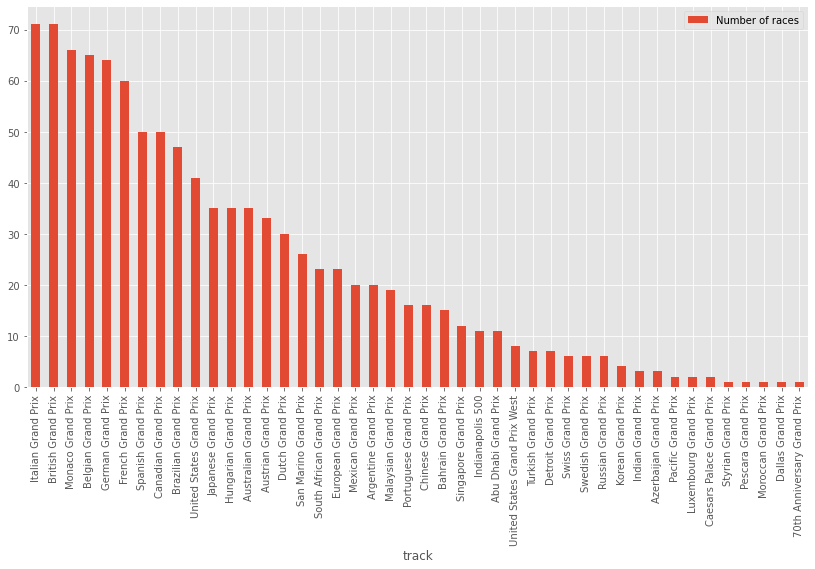

In [65]:
q=pd.read_sql_query(query,conn)
q.rename(columns={'races_held':'Number of races'},inplace=True)

reace_tracks=q.copy()

fig,ax=plt.subplots(figsize=(14,7))
reace_tracks.plot.bar(x='track',y='Number of races',ax=ax);

Italian grand prix and British grand prix are the only grand prix to be never missed F1 calender to this date. Monaco grand prix is the second most respected grand prix of the F1 calender.

## 2. Circuits - where polesitters win

In [66]:
query="""
    select r.circuitId, ssq.name, ssq.cnt, count(r.circuitId) race_count from races r join
    (select ckt.circuitId, ckt.name, count(sq.circuitId) cnt from circuit ckt join
    (select rs.raceId, r.circuitId from races r join
    results rs on r.raceId=rs.raceId
    where rs.grid=1 and rs.position=1) sq
    on ckt.circuitId=sq.circuitId
    group by sq.circuitId) ssq
    on r.circuitId=ssq.circuitId
    group by r.circuitId 
"""

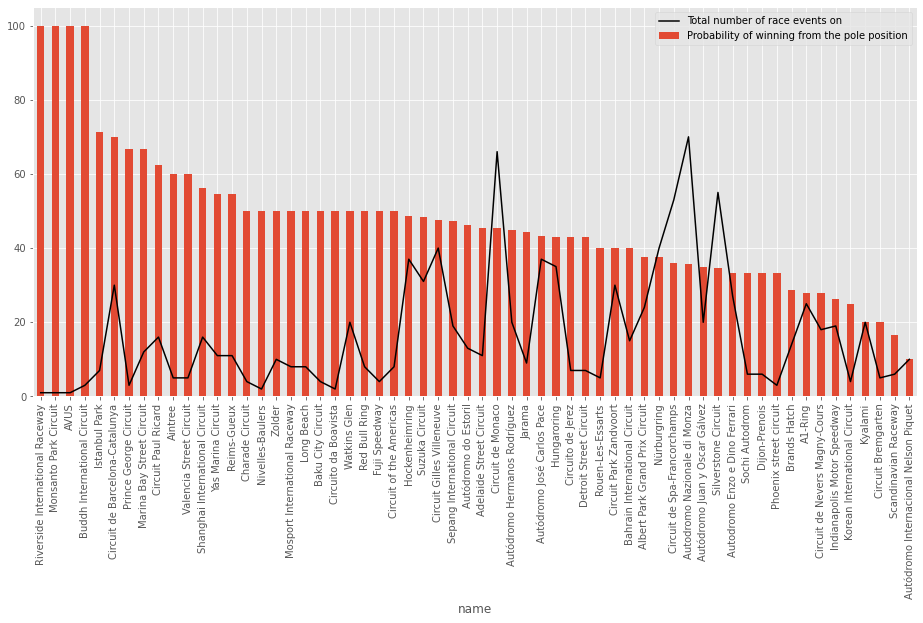

In [67]:
q=pd.read_sql_query(query,conn)

q['percentage_win']=round((q['cnt']/q['race_count'])*100,2)
q.drop(['circuitId','cnt'],axis=1,inplace=True)
q=q.sort_values(by=['percentage_win'],ascending=False)


fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(13,6))
fig.tight_layout()
q.plot(x='name',y='race_count',ax=ax, rot=90, color='k',label='Total number of race events on')
q.plot.bar(x='name',y='percentage_win',ax=ax, rot=90,label='Probability of winning from the pole position');

Everybody on the every track wants to start from the pole position but for few tracks the pole position becomes even more improtant. By combining bar plot and line plot the Circuit de Barcelona-Catalunya is one of those circuits.

## 3. Circuits -where polesitters don't win

In [68]:
query="""
    select ssq.name, count(r.raceId) total_races, ssq.cnt from races r join
    (select ckt.name, sq.circuitId, count(sq.raceId) cnt from circuit ckt join
    (select rs.raceId, r.circuitId from races r join
    results rs on r.raceId=rs.raceId
    where rs.grid=1 and rs.position!=1) sq
    on ckt.circuitId=sq.circuitId
    group by ckt.name) ssq
    on r.circuitId=ssq.circuitId
    group by ssq.name
"""

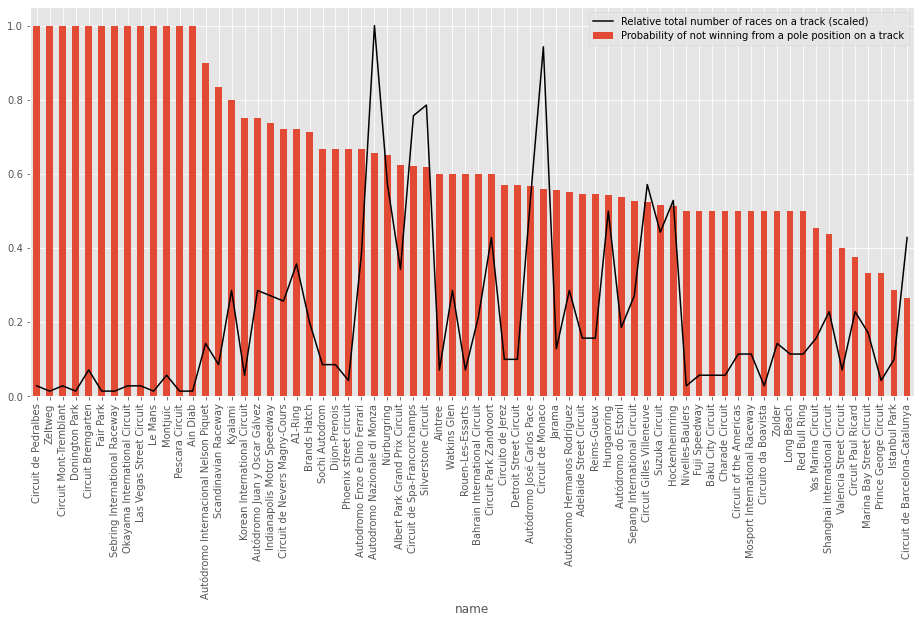

In [69]:
q=pd.read_sql_query(query,conn)
q['percentage_lose']=q['cnt']/q['total_races']
q.drop(['cnt'],axis=1,inplace=True)
q=q.sort_values(by=['percentage_lose'],ascending=False)

q['scaled_total_races']=q['total_races']/max(q['total_races'])

fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(13,6))
fig.tight_layout()
q.plot(x='name',y='scaled_total_races',ax=ax, rot=90, color='k', label='Relative total number of races on a track (scaled)')
q.plot.bar(x='name',y='percentage_lose',ax=ax, rot=90, label='Probability of not winning from a pole position on a track');

On two of the most oldest tracks, Monza and Silverstone, starting from the pole does not provide drivers huge advantage over the other derivers behind the grid.

# E) Comparision of last two decades 2000-2009 and 2010-2019 <br>
## 1. Drivers by number of race appearances

In [70]:
query="""
    select dr.name, sq.races from drivers dr
    join
    (select driverId, count(*) races from results rs join
    races r on rs.raceId=r.raceId
    where r.year>1999 and r.year<2010
    group by driverId) sq
    on dr.driverId=sq.driverId
    order by sq.races desc
"""

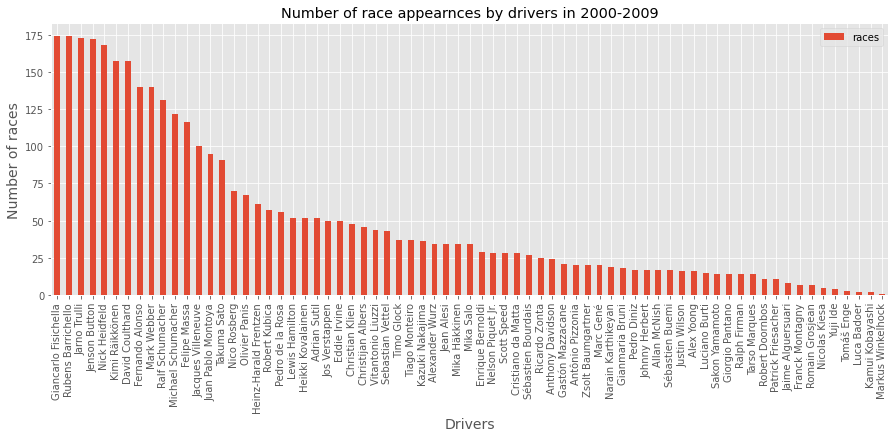

In [71]:
q=pd.read_sql_query(query,conn)
q.rename(columns={'name':'driver'},inplace=True)

v8_drivers_races=q.copy()

fig,ax=plt.subplots(figsize=(15,5))

v8_drivers_races.plot.bar(x='driver',y='races',ax=ax)
ax.set_title('Number of race appearnces by drivers in 2000-2009')
ax.set_xlabel('Drivers',fontsize=14)
ax.set_ylabel('Number of races',fontsize=14);

In [72]:
query="""
    select dr.name, sq.races from drivers dr
    join
    (select driverId, count(*) races from results rs join
    races r on rs.raceId=r.raceId
    where r.year>2009 and r.year<2020
    group by driverId) sq
    on dr.driverId=sq.driverId
    order by sq.races desc
"""

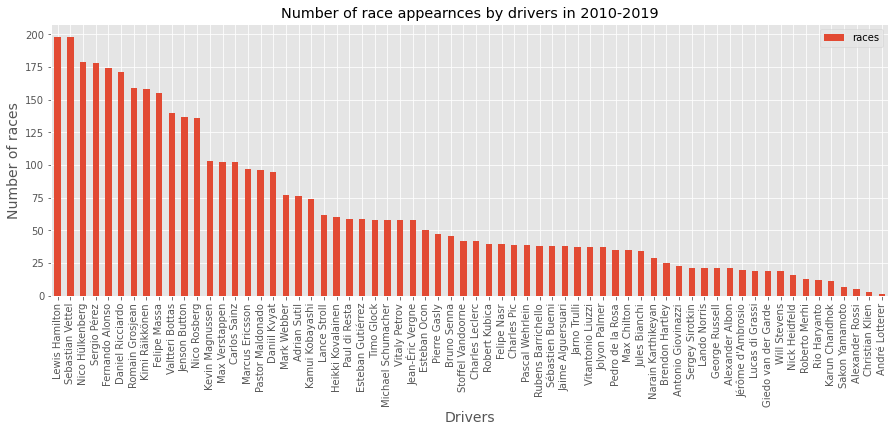

In [73]:
q=pd.read_sql_query(query,conn)
q.rename(columns={'name':'driver'},inplace=True)

v6_drivers_races=q.copy()
fig,ax=plt.subplots(figsize=(15,5))
v6_drivers_races.plot.bar(x='driver',y='races',ax=ax)
ax.set_title('Number of race appearnces by drivers in 2010-2019')
ax.set_xlabel('Drivers',fontsize=14)
ax.set_ylabel('Number of races',fontsize=14);

## 2. Number of drivers raced in a decade

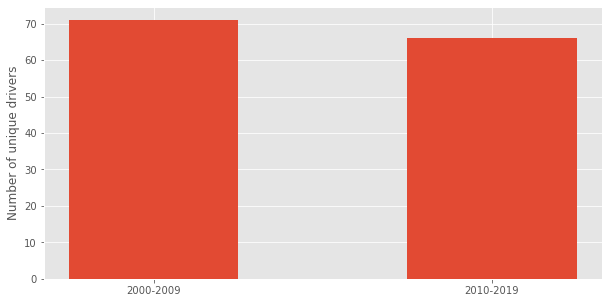

In [74]:
fig,ax=plt.subplots(figsize=(10,5))
ax.bar(x=[1,2],height=[v8_drivers_races.shape[0],v6_drivers_races.shape[0]],width=0.5)
ax.set_xticks([1,2])
ax.set_xticklabels(['2000-2009','2010-2019'])
ax.set_ylabel('Number of unique drivers',fontsize=12);

So number of drivers that participated in the 2010-2019 decade fall short compare to the last one.

## 3. Race winners (drivers) by number of wins

In [75]:
query="""
    select dr.name, count(*) wins from results rs join
    drivers dr on rs.driverId=dr.driverId
    where rs.raceId in (select distinct(r.raceId) from races r
    where r.year>1999 and r.year<2010) and rs.position=1
    group by dr.name
    order by wins desc
"""

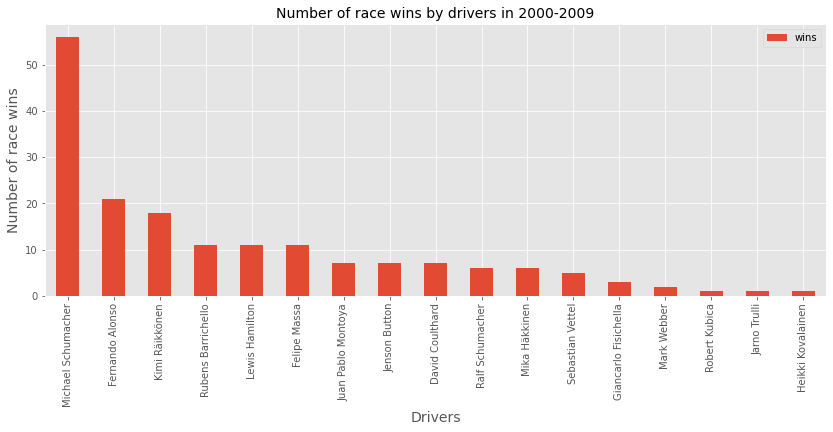

In [76]:
q=pd.read_sql_query(query,conn)
q.rename(columns={'name':'driver'},inplace=True)

winners_v8=q.copy()

fig,ax=plt.subplots(figsize=(14,5))
winners_v8.plot.bar(x='driver',y='wins',ax=ax)
ax.set_title('Number of race wins by drivers in 2000-2009',fontsize=14)
ax.set_xlabel('Drivers',fontsize=14)
ax.set_ylabel('Number of race wins',fontsize=14);

In [77]:
query="""
    select dr.name, count(*) wins from results rs join
    drivers dr on rs.driverId=dr.driverId
    where rs.raceId in (select distinct(r.raceId) from races r
    where r.year>2009 and r.year<2020) and rs.position=1
    group by dr.name
    order by wins desc
"""

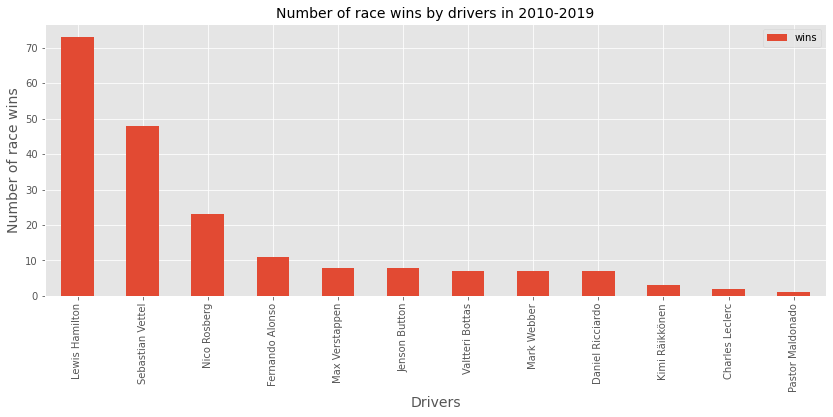

In [78]:
q=pd.read_sql_query(query,conn)
q.rename(columns={'name':'driver'},inplace=True)

winners_v6=q.copy()

fig,ax=plt.subplots(figsize=(14,5))
winners_v6.plot.bar(x='driver',y='wins',ax=ax)
ax.set_title('Number of race wins by drivers in 2010-2019',fontsize=14)
ax.set_xlabel('Drivers',fontsize=14)
ax.set_ylabel('Number of race wins',fontsize=14);

## 4. Number distinct race winners in a decade

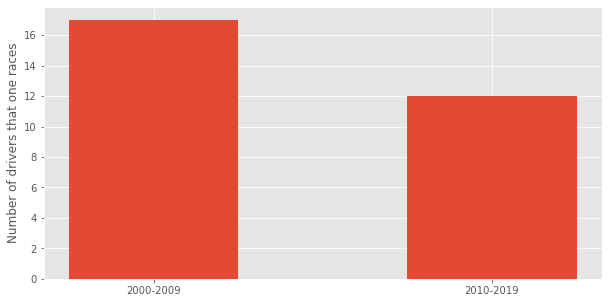

In [79]:
fig,ax=plt.subplots(figsize=(10,5))
ax.bar(x=[1,2],height=[winners_v8.shape[0],winners_v6.shape[0]],width=0.5)
ax.set_xticks([1,2])
ax.set_xticklabels(['2000-2009','2010-2019'])
ax.set_ylabel('Number of drivers that one races',fontsize=12);

The count of different drivers that won races also reduced in 2010 decade compare to 2000 decade

## 5. Drivers by percentages of race wins

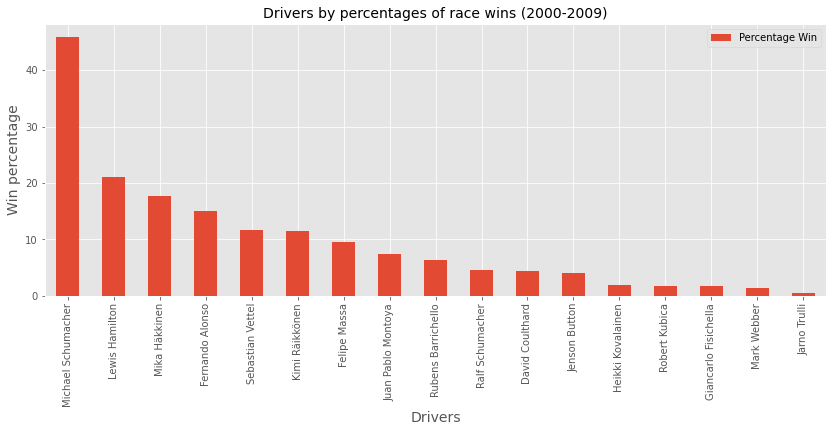

In [80]:
v8_driver_perc_win=pd.merge(winners_v8,v8_drivers_races,how='inner',on='driver')

v8_driver_perc_win['Percentage Win']=round((v8_driver_perc_win['wins']/v8_driver_perc_win['races'])*100,2)
v8_driver_perc_win.drop(['wins','races'],axis=1,inplace=True)

v8_driver_perc_win=v8_driver_perc_win.sort_values(by='Percentage Win', ascending=False)

fig,ax=plt.subplots(figsize=(14,5))
v8_driver_perc_win.plot.bar(x='driver',y='Percentage Win',ax=ax)
ax.set_title("Drivers by percentages of race wins (2000-2009)",fontsize=14)
ax.set_ylabel('Win percentage',fontsize=14)
ax.set_xlabel('Drivers',fontsize=14);

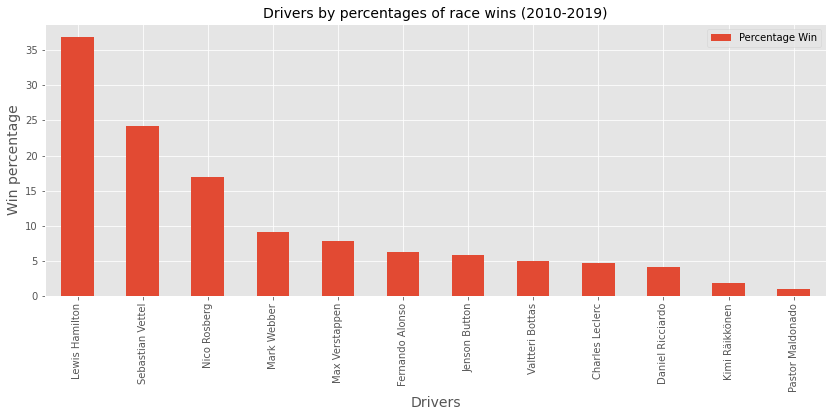

In [81]:
v6_driver_perc_win=pd.merge(winners_v6,v6_drivers_races,how='inner',on='driver')

v6_driver_perc_win['Percentage Win']=round((v6_driver_perc_win['wins']/v6_driver_perc_win['races'])*100,2)
v6_driver_perc_win.drop(['wins','races'],axis=1,inplace=True)

v6_driver_perc_win=v6_driver_perc_win.sort_values(by='Percentage Win', ascending=False)

fig,ax=plt.subplots(figsize=(14,5))
v6_driver_perc_win.plot.bar(x='driver',y='Percentage Win',ax=ax)
plt.title("Drivers by percentages of race wins (2010-2019)",fontsize=14)
ax.set_ylabel('Win percentage',fontsize=14)
ax.set_xlabel('Drivers',fontsize=14);

## 6. Driver's championships

In [82]:
query="""
    select sq.year, sq.name, max(sq.season_score) winning_score from 
    (select r.year, dr.name, sum(rs.points) season_score from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId
    where r.year>1999 and r.year<2010
    group by rs.driverId, r.year) sq
    group by sq.year
"""

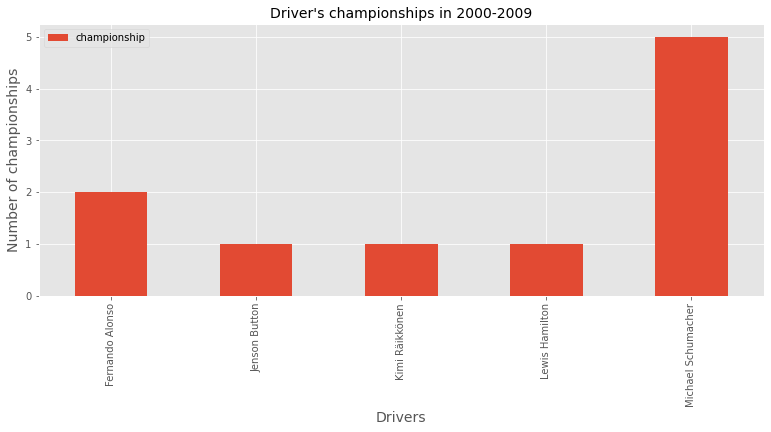

In [83]:
q=pd.read_sql_query(query,conn)

v8_champions=q.copy()

v8_champions.rename(columns={'year':'championship','name':'driver'},inplace=True)

fig,ax=plt.subplots(figsize=(13,5))
v8_champions[['driver','championship']].groupby(by='driver',as_index=False).count().plot.bar(x='driver',y='championship',ax=ax)
ax.set_title("Driver's championships in 2000-2009",fontsize=14)
ax.set_xlabel('Drivers',fontsize=14)
ax.set_ylabel('Number of championships',fontsize=14);

In [84]:
query="""
    select sq.year, sq.name, max(sq.season_score) winning_score from 
    (select r.year, dr.name, sum(rs.points) season_score from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId
    where r.year>2009 and r.year<2020
    group by rs.driverId, r.year) sq
    group by sq.year
"""

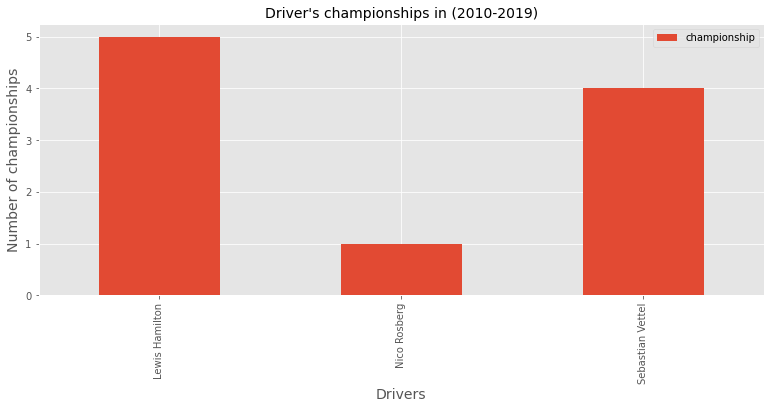

In [85]:
q=pd.read_sql_query(query,conn)

v6_champions=q.copy()

v6_champions.rename(columns={'year':'championship','name':'driver'},inplace=True)

fig,ax=plt.subplots(figsize=(13,5))
v6_champions[['driver','championship']].groupby(by='driver',as_index=False).count().plot.bar(x='driver',y='championship',ax=ax)
ax.set_title("Driver's championships in (2010-2019)",fontsize=14)
ax.set_xlabel('Drivers',fontsize=14)
ax.set_ylabel('Number of championships',fontsize=14);

In the championship plot picture is even worst. So in 2010's decade only three drivers were able to win the title compared to five in 2000's decade.

## 7. Driver's pole positions

In [86]:
query="""
    select dr.name, count(qu.position) pole_position from quali qu join
    races r on qu.raceId=r.raceId join
    drivers dr on qu.driverId=dr.driverId
    where r.year>1999 and r.year<2010 and qu.position=1
    group by dr.name
    order by pole_position desc
"""

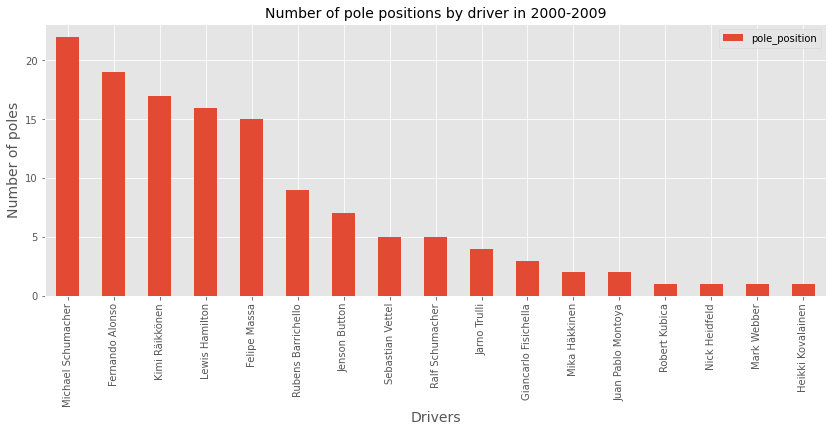

In [87]:
q=pd.read_sql_query(query,conn)
q.rename({'name':'driver'})

fig,ax=plt.subplots(figsize=(14,5))
q.plot.bar(x='name',y='pole_position',ax=ax)
ax.set_title('Number of pole positions by driver in 2000-2009',fontsize=14)
ax.set_xlabel('Drivers',fontsize=14)
ax.set_ylabel('Number of poles',fontsize=14);

In [88]:
query="""
    select dr.name, count(qu.position) pole_position from quali qu join
    races r on qu.raceId=r.raceId join
    drivers dr on qu.driverId=dr.driverId
    where r.year>2009 and r.year<2020 and qu.position=1
    group by dr.name
    order by pole_position desc
"""

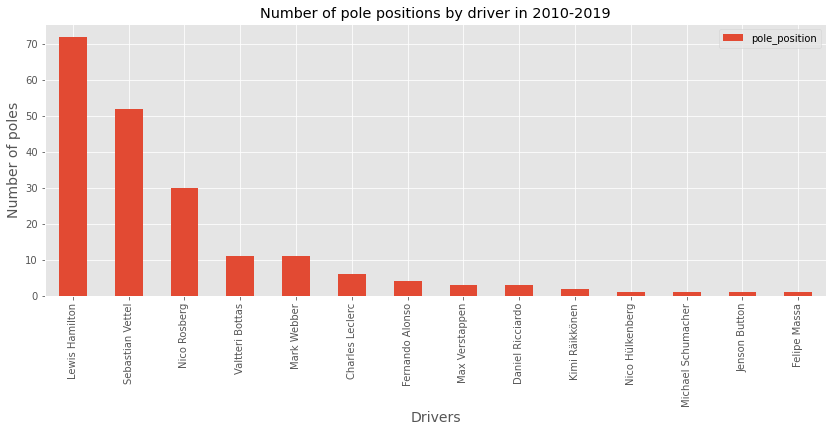

In [89]:
q=pd.read_sql_query(query,conn)
q.rename({'name':'driver'})

fig,ax=plt.subplots(figsize=(14,5))
q.plot.bar(x='name',y='pole_position',ax=ax)
ax.set_title('Number of pole positions by driver in 2010-2019')
ax.set_xlabel('Drivers',fontsize=14)
ax.set_ylabel('Number of poles',fontsize=14);

# F) Comparison of two contemporary multi title holders: Sebastian and Hamilton (Head-to-Head) <br>
## 1. First season

In [90]:
query="""
    select dr.name, min(r.year) debut_year, ckt.name from results rs join
    drivers dr on rs.driverId=dr.driverId join
    races r on r.raceId=rs.raceId join
    circuit ckt on r.circuitId=ckt.circuitId
    where dr.name='Lewis Hamilton' or dr.name='Sebastian Vettel'
    group by dr.name
"""
q=pd.read_sql_query(query,conn)
q

,name,debut_year,name
0,Lewis Hamilton,2007,Albert Park Grand Prix Circuit
1,Sebastian Vettel,2007,Indianapolis Motor Speedway


## 2. Season performance based on points scored in a season (2007-2019)

In [91]:
query="""
    select r.round, r.year, dr.name driver, 
    sum(rs.points) over (partition by r.year, dr.name order by r.round) as season_score
    from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId
    where (dr.name='Lewis Hamilton' or dr.name='Sebastian Vettel') and r.year>=2007 and r.year<2020
    order by r.year, r.round
"""

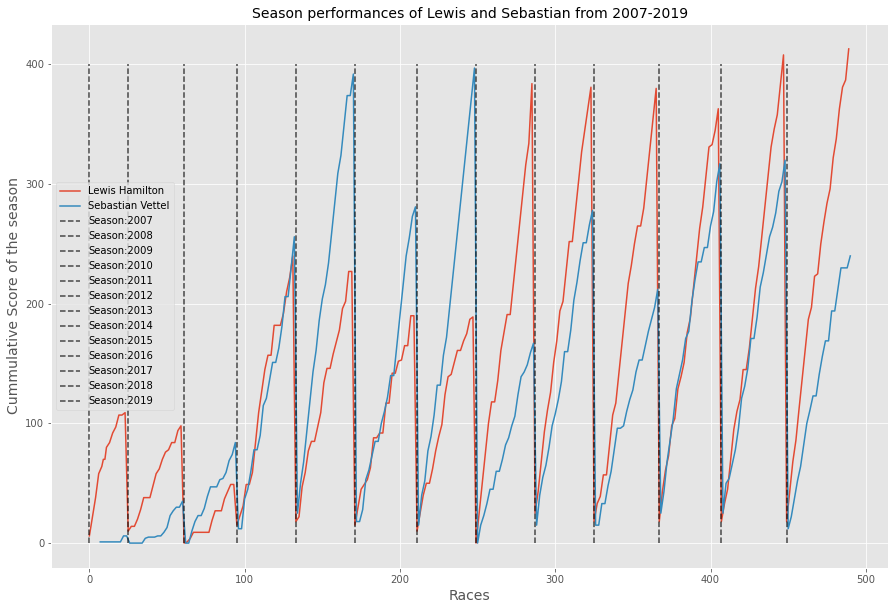

In [92]:
q=pd.read_sql_query(query,conn)

lewise_seb=q.copy()
years_of_champs=lewise_seb.year.tolist()
index=[]
yrs=sorted(list(set(years_of_champs)))
for ind in yrs:
    index.append(years_of_champs.index(ind))
    
fig,ax=plt.subplots(figsize=(15,10))
lewise_seb.groupby(by='driver')['season_score'].plot.line(ax=ax)
for ind in index:
    ax.plot([ind]*2,[0,400], ls='--',label='Season:'+str(years_of_champs[ind]),c='black', alpha=0.7)
ax.set_xlabel('Races',fontsize=14)
ax.set_ylabel('Cummulative Score of the season',fontsize=14)
ax.set_title('Season performances of Lewis and Sebastian from 2007-2019',fontsize=14)
plt.legend();

## 3. Percent of maximum possible points scored <br>
Now, in any season, maximum points available for a driver is (number of races in a season)x(points awarded to a race winner). Note that from 2019 season one extra point is given to a driver how claims fastest lap of the race. Here, we are not counting that one extra point.

In [93]:
query="""
    select r.year, dr.name, round((sum(rs.points)/sq.max_season_race_points_possible)*100,2) percentage_of_maximum_race_points_possible from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId join
    (select r.year, (round(max(rs.points)/5)*5)*count(distinct(rs.raceId)) max_season_race_points_possible from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId
    where r.year>2006 and r.year<2020
    group by r.year) sq on r.year=sq.year
    where (r.year>2006 and r.year<2020) and (dr.name='Lewis Hamilton' or dr.name='Sebastian Vettel')
    group by r.year, rs.driverId
"""

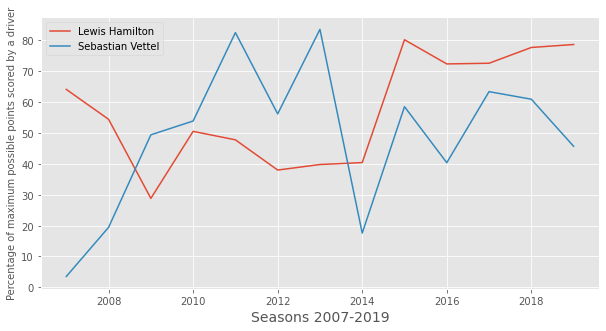

In [94]:
q=pd.read_sql_query(query,conn)

season_winning_score_precentage=q

fig,ax=plt.subplots(figsize=(10,5))

ax.plot(range(2007,2020),list(season_winning_score_precentage.percentage_of_maximum_race_points_possible[season_winning_score_precentage.name=='Lewis Hamilton']), label='Lewis Hamilton')
ax.plot(range(2007,2020),list(season_winning_score_precentage.percentage_of_maximum_race_points_possible[season_winning_score_precentage.name=='Sebastian Vettel']), label='Sebastian Vettel')
ax.set_ylabel('Percentage of maximum possible points scored by a driver',fontsize=10)
ax.set_xlabel('Seasons 2007-2019',fontsize=14)
plt.legend();

## 4. Points scored over the F1 career

In [95]:
query="""
    select dr.name, rs.position from results rs join
    drivers dr on rs.driverId=dr.driverId join
    races r on rs.raceId=r.raceId
    where dr.name in ('Sebastian Vettel','Lewis Hamilton')
    group by r.year, r.round, dr.name
"""

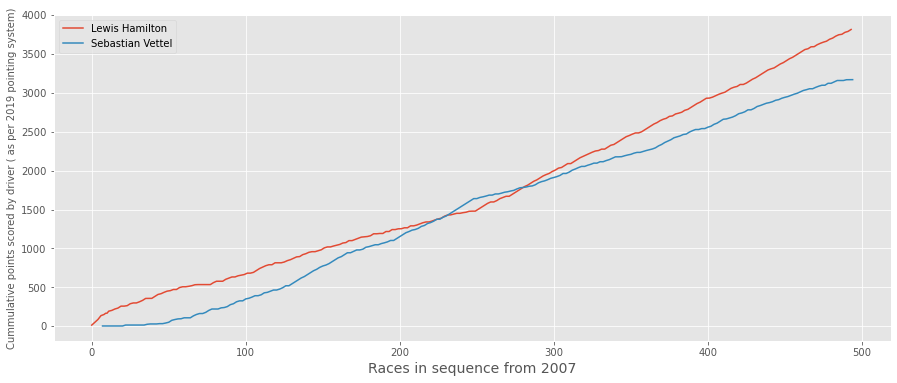

In [96]:
q=pd.read_sql_query(query,conn)

q.rename(columns={'position':'points'},inplace=True)

oop=q[q.points>10].index
q.points.iloc[oop]=0

q.points.replace({1:25,2:18,3:15,4:12,5:10,6:8,7:6,8:4,9:2,10:1},inplace=True)

lew_pts=np.cumsum(q[q.name=='Lewis Hamilton'].points)
seb_pts=np.cumsum(q[q.name=='Sebastian Vettel'].points)

fig,ax=plt.subplots(figsize=(15,6))
ax.plot(lew_pts,label='Lewis Hamilton')
ax.plot(seb_pts,label='Sebastian Vettel')
ax.set_xlabel('Races in sequence from 2007',fontsize=14)
ax.set_ylabel('Cummulative points scored by driver ( as per 2019 pointing system)',fontsize=10)
plt.legend();

In terms of points Lewis almost always has been on the top of Seb.

### If you enjoyed the analysis and felt like you have experienced little bit of F1's history, please upvote this notebook. Thanks in advance!